In [1]:
#import required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import preprocessing

# In a notebook environment, display the plots inline
%matplotlib inline



In [2]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(10886, 13) (6493, 10) (17379, 13)


In [4]:
#Missing Values?
data.apply(lambda x: sum(x.isnull()))

atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
source           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

In [5]:
#No missing values


data.describe()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
count,17379.000000,10886.000000,10886.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,23.788755,36.021955,191.574132,0.028770,62.722884,155.552177,2.501640,20.376474,1.425283,12.736540,0.682721
std,8.592511,49.960477,181.144454,0.167165,19.292983,151.039033,1.106918,7.894801,0.639357,8.196795,0.465431
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000
25%,16.665000,4.000000,42.000000,0.000000,48.000000,36.000000,2.000000,13.940000,1.000000,7.001500,0.000000
50%,24.240000,17.000000,145.000000,0.000000,63.000000,118.000000,3.000000,20.500000,1.000000,12.998000,1.000000
75%,31.060000,49.000000,284.000000,0.000000,78.000000,222.000000,3.000000,27.060000,2.000000,16.997900,1.000000
max,50.000000,367.000000,977.000000,1.000000,100.000000,886.000000,4.000000,41.000000,4.000000,56.996900,1.000000


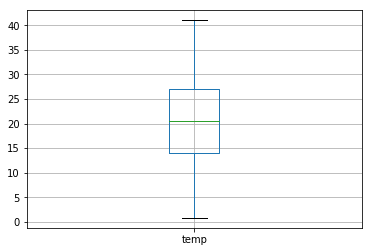

In [7]:
#~63% the weather is 1 i.e mostly clear weather

# How much is the temp? - on an average the temp is 20.37 deg - Mean is susceptible to outliers - remember considering billgates salary along with all? 
# So without outliers - the median gives us the number without outliers - so on an average the temp is 20.5 deg
# Mode shouldn't be used with continuous data, should only be used with discrete data
data['weather'].mode()
# mostly clear weather

data.boxplot(column='temp', sym='o', return_type='axes')




In [8]:
#Create all Utility Functions here:

# Define a function to create the scatterplot. This makes it easy to
# reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

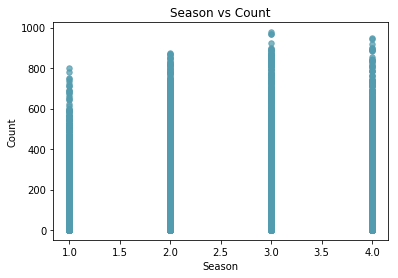

In [9]:
# Call the function to create plot
scatterplot(x_data = data['season']
            , y_data = data['count']
            , x_label = 'Season'
            , y_label = 'Count'
            , title = 'Season vs Count')

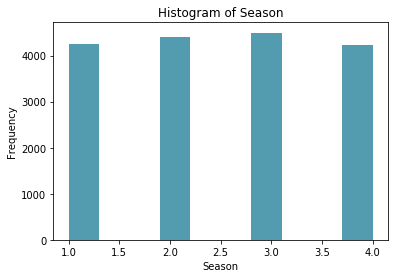

In [11]:
# Call the function to create plot
histogram(data = data['season']
           , x_label = 'Season'
           , y_label = 'Frequency'
           , title = 'Histogram of Season')

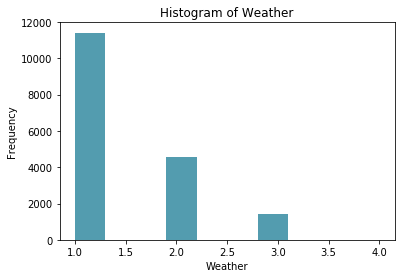

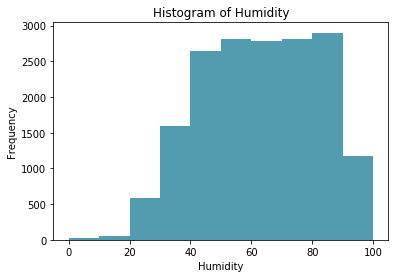

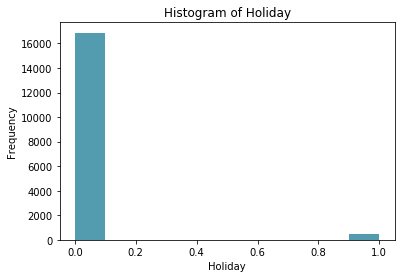

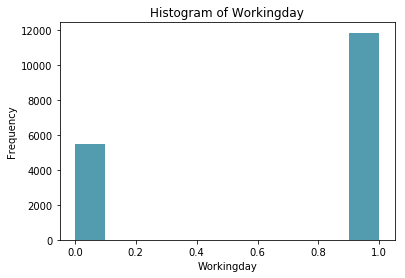

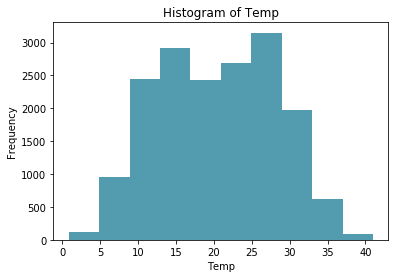

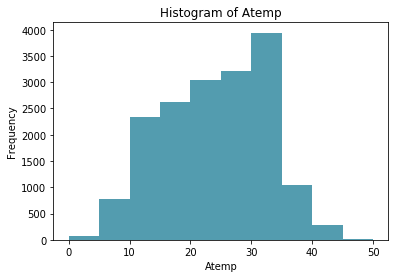

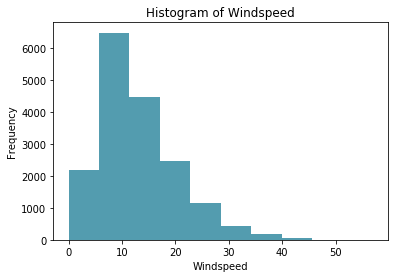

In [12]:
#hist(data$weather)
histogram(data = data['weather']
           , x_label = 'Weather'
           , y_label = 'Frequency'
           , title = 'Histogram of Weather')
#hist(data$humidity)
histogram(data = data['humidity']
           , x_label = 'Humidity'
           , y_label = 'Frequency'
           , title = 'Histogram of Humidity')
#hist(data$holiday)
histogram(data = data['holiday']
           , x_label = 'Holiday'
           , y_label = 'Frequency'
           , title = 'Histogram of Holiday')
#hist(data$workingday)
histogram(data = data['workingday']
           , x_label = 'Workingday'
           , y_label = 'Frequency'
           , title = 'Histogram of Workingday')
#hist(data$temp)
histogram(data = data['temp']
           , x_label = 'Temp'
           , y_label = 'Frequency'
           , title = 'Histogram of Temp')
#hist(data$atemp)
histogram(data = data['atemp']
           , x_label = 'Atemp'
           , y_label = 'Frequency'
           , title = 'Histogram of Atemp')
#hist(data$windspeed)
histogram(data = data['windspeed']
           , x_label = 'Windspeed'
           , y_label = 'Frequency'
           , title = 'Histogram of Windspeed')

In [13]:
#Few inferences can be drawn by looking at the these histograms:

#Season has four categories of almost equal distribution
#Weather 1 has higher contribution i.e. mostly clear weather.

#As expected, mostly working days and variable holiday is also showing a similar inference. Here you can generate a variable for weekday using holiday and working day. Incase, if both have zero values, then it must be a working day.
#Variables temp, atemp, humidity and windspeed  looks naturally distributed

In [14]:
data.apply(lambda x: len(x.unique()))

atemp            65
casual          310
count           823
datetime      17379
holiday           2
humidity         89
registered      732
season            4
source            2
temp             50
weather           4
windspeed        30
workingday        2
dtype: int64

In [18]:
def splitDatetime(data) :

   datatime = pd.DatetimeIndex(data.datetime)
   data['year'] = datatime.year
   data['month'] = datatime.month
   data['day'] = datatime.day
   data['hour'] = datatime.hour
   return data

splitDatetime(data)
#data
# We don't have any categorical variables. Only numerics.
from sklearn import preprocessing



cols_to_scale = ['atemp','holiday','humidity','season','temp','weather','windspeed','year','month','day','hour']

min_max_scaler = preprocessing.MinMaxScaler()

for col in cols_to_scale:
    data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])

data

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday,year,month,day,hour
0,0.2879,3.0,16.0,2011-01-01 00:00:00,0.0,0.81,13.0,0.0,train,0.224490,0.000000,0.000000,0,0.0,0.0,0.000000,0.000000
1,0.2727,8.0,40.0,2011-01-01 01:00:00,0.0,0.80,32.0,0.0,train,0.204082,0.000000,0.000000,0,0.0,0.0,0.000000,0.043478
2,0.2727,5.0,32.0,2011-01-01 02:00:00,0.0,0.80,27.0,0.0,train,0.204082,0.000000,0.000000,0,0.0,0.0,0.000000,0.086957
3,0.2879,3.0,13.0,2011-01-01 03:00:00,0.0,0.75,10.0,0.0,train,0.224490,0.000000,0.000000,0,0.0,0.0,0.000000,0.130435
4,0.2879,0.0,1.0,2011-01-01 04:00:00,0.0,0.75,1.0,0.0,train,0.224490,0.000000,0.000000,0,0.0,0.0,0.000000,0.173913
5,0.2576,0.0,1.0,2011-01-01 05:00:00,0.0,0.75,1.0,0.0,train,0.224490,0.333333,0.105325,0,0.0,0.0,0.000000,0.217391
6,0.2727,2.0,2.0,2011-01-01 06:00:00,0.0,0.80,0.0,0.0,train,0.204082,0.000000,0.000000,0,0.0,0.0,0.000000,0.260870
7,0.2576,1.0,3.0,2011-01-01 07:00:00,0.0,0.86,2.0,0.0,train,0.183673,0.000000,0.000000,0,0.0,0.0,0.000000,0.304348
8,0.2879,1.0,8.0,2011-01-01 08:00:00,0.0,0.75,7.0,0.0,train,0.224490,0.000000,0.000000,0,0.0,0.0,0.000000,0.347826
9,0.3485,8.0,14.0,2011-01-01 09:00:00,0.0,0.76,6.0,0.0,train,0.306122,0.000000,0.000000,0,0.0,0.0,0.000000,0.391304


In [19]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['casual','registered','count','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
#Model building

#Mean based:
median_count = train['count'].median()

#Define a dataframe with IDs for submission:
base1 = test[['datetime']]
base1['count'] = median_count

#Export submission file
base1.to_csv("alg0.csv",index=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
#Define target and ID columns:
target = 'count'
IDcol = ['datetime']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Linear Regression Model
# Lets make our first linear-regression model

from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
print(predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

['atemp', 'casual', 'holiday', 'humidity', 'registered', 'season', 'temp', 'weather', 'windspeed', 'workingday', 'year', 'month', 'day', 'hour']


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\li


Model Report
RMSE : 1.711e-13
CV Score : Mean - 2.613e-13 | Std - 1.408e-13 | Min - 1.252e-13 | Max - 8.02e-13


KeyError: "['casual' 'registered'] not in index"